# Importing libraries

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Data Loading

In [81]:

df = pd.read_csv('trafficCrashes.csv')


In [82]:
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,BEAT_OF_OCCURRENCE,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,JG387648,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1654.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,JG361138,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,1235.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,JG388133,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1633.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,JC524901,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,1655.0,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,8
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,JG387475,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,1653.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10


# Exploratory Data Analysis (EDA)

In [83]:

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5554 entries, 0 to 5553
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                5554 non-null   object 
 1   RD_NO                          5554 non-null   object 
 2   CRASH_DATE                     5554 non-null   object 
 3   POSTED_SPEED_LIMIT             5554 non-null   int64  
 4   TRAFFIC_CONTROL_DEVICE         5554 non-null   object 
 5   DEVICE_CONDITION               5554 non-null   object 
 6   WEATHER_CONDITION              5554 non-null   object 
 7   LIGHTING_CONDITION             5554 non-null   object 
 8   FIRST_CRASH_TYPE               5554 non-null   object 
 9   TRAFFICWAY_TYPE                5554 non-null   object 
 10  LANE_CNT                       1183 non-null   float64
 11  ALIGNMENT                      5554 non-null   object 
 12  ROADWAY_SURFACE_COND           5554 non-null   o

# Describing the data

In [84]:
print(df.describe())

       POSTED_SPEED_LIMIT     LANE_CNT      STREET_NO  BEAT_OF_OCCURRENCE  \
count         5554.000000  1183.000000    5554.000000         5552.000000   
mean            27.687793     2.948436    3409.009903         1265.948487   
std              7.778384     3.734625    6812.907580          672.652137   
min              0.000000     0.000000       0.000000          111.000000   
25%             25.000000     2.000000     516.250000          722.000000   
50%             30.000000     2.000000    2501.000000         1434.000000   
75%             30.000000     4.000000    5500.000000         1654.000000   
max             65.000000    99.000000  451100.000000         6100.000000   

       INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
count     5540.000000     5540.000000              5540.000000   
mean         0.191336        0.001625                 0.019495   
std          0.564200        0.040277                 0.168837   
min          0.000000        0.000000     

# Data Cleaning

In [85]:

print("Missing Values:")
print(df.isnull().sum())
df = df.dropna()


Missing Values:
CRASH_RECORD_ID                     0
RD_NO                               0
CRASH_DATE                          0
POSTED_SPEED_LIMIT                  0
TRAFFIC_CONTROL_DEVICE              0
DEVICE_CONDITION                    0
WEATHER_CONDITION                   0
LIGHTING_CONDITION                  0
FIRST_CRASH_TYPE                    0
TRAFFICWAY_TYPE                     0
LANE_CNT                         4371
ALIGNMENT                           0
ROADWAY_SURFACE_COND                0
ROAD_DEFECT                         0
REPORT_TYPE                       120
CRASH_TYPE                          0
DAMAGE                              0
DATE_POLICE_NOTIFIED                0
PRIM_CONTRIBUTORY_CAUSE             0
SEC_CONTRIBUTORY_CAUSE              0
STREET_NO                           0
STREET_DIRECTION                    2
STREET_NAME                         0
BEAT_OF_OCCURRENCE                  2
MOST_SEVERE_INJURY                 14
INJURIES_TOTAL                    

# Feature Engineering

In [86]:

df['CRASH_HOUR'] = pd.to_datetime(df['CRASH_DATE']).dt.hour


# Pair plot for selected numeric variables

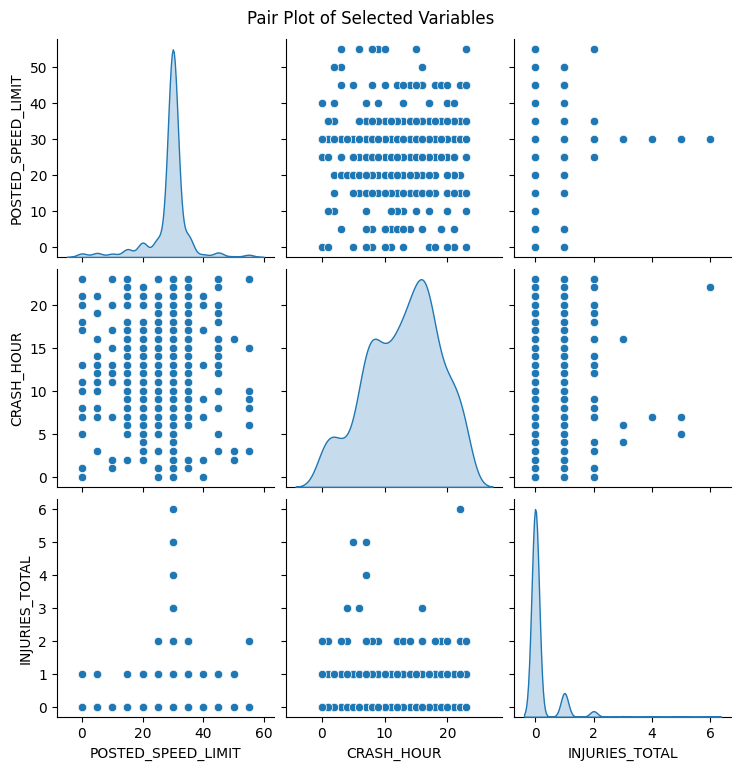

In [87]:

sns.pairplot(df[['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'INJURIES_TOTAL', 'DAMAGE']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()


# Bar plot for 'LIGHTING_CONDITION'

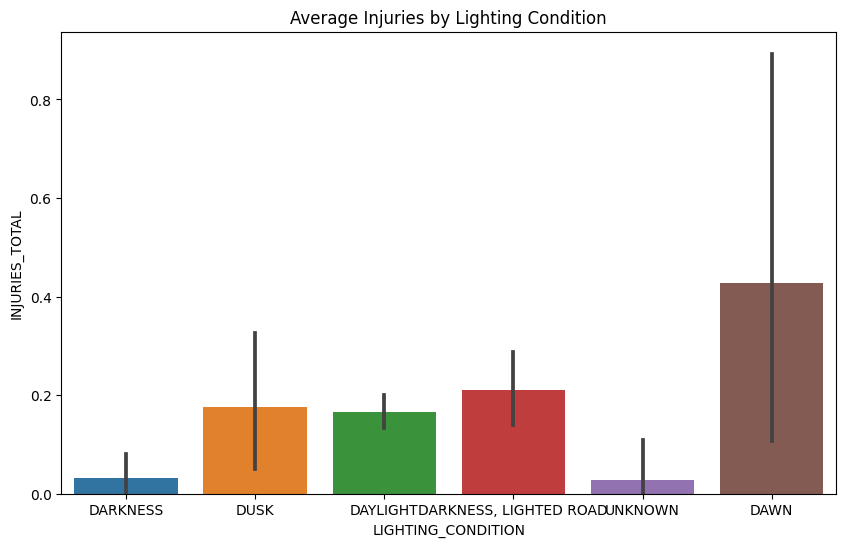

In [88]:

plt.figure(figsize=(10, 6))
sns.barplot(x='LIGHTING_CONDITION', y='INJURIES_TOTAL', data=df)
plt.title('Average Injuries by Lighting Condition')
plt.show()


# Histogram of 'INJURIES_TOTAL'

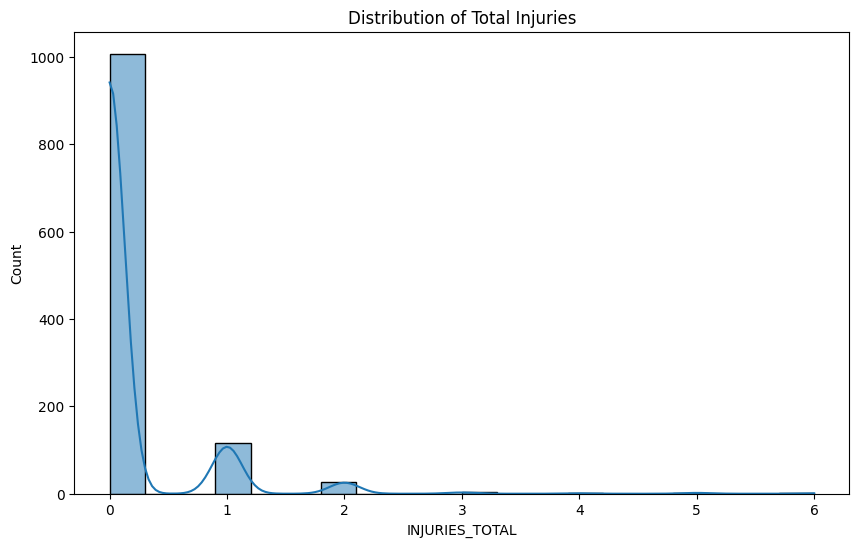

In [89]:

plt.figure(figsize=(10, 6))
sns.histplot(df['INJURIES_TOTAL'], bins=20, kde=True)
plt.title('Distribution of Total Injuries')
plt.show()


# Pie Chart for Crash Types

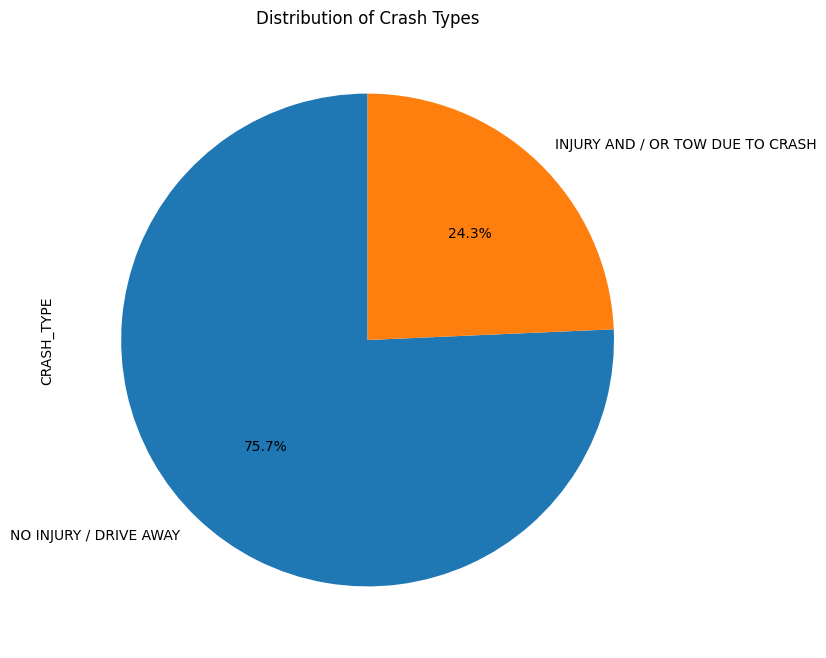

In [90]:
plt.figure(figsize=(8, 8))
df['CRASH_TYPE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Crash Types')
plt.show()


# Stacked Bar Plot for Crash Types by Weather Condition

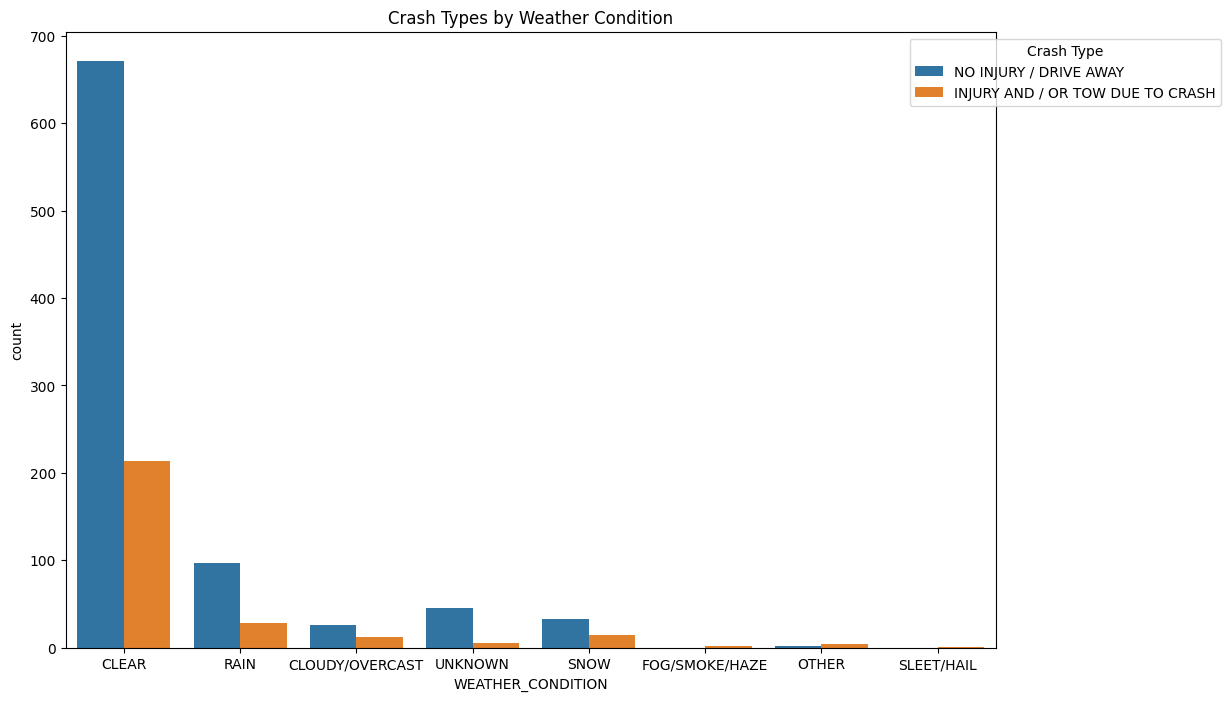

In [91]:
plt.figure(figsize=(12, 8))
sns.countplot(x='WEATHER_CONDITION', hue='CRASH_TYPE', data=df)
plt.title('Crash Types by Weather Condition')
plt.legend(title='Crash Type', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


# Line Plot for Injuries over Time (hourly)

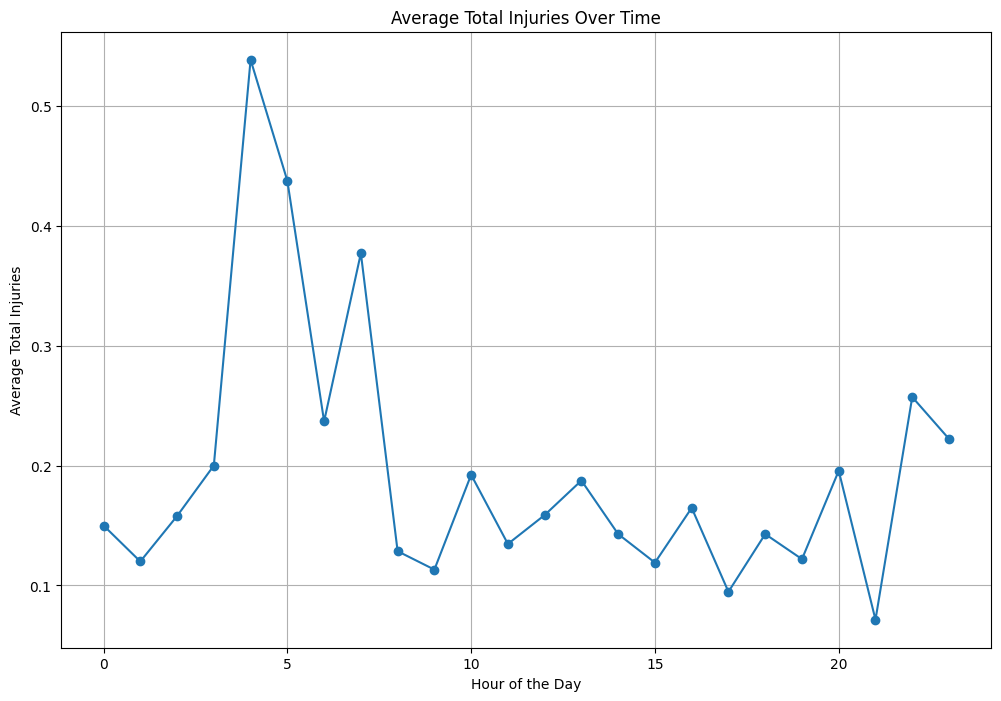

In [92]:
plt.figure(figsize=(12, 8))
df.groupby('CRASH_HOUR')['INJURIES_TOTAL'].mean().plot(marker='o')
plt.title('Average Total Injuries Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Injuries')
plt.grid(True)
plt.show()


# Heatmap for Hourly Traffic Flow

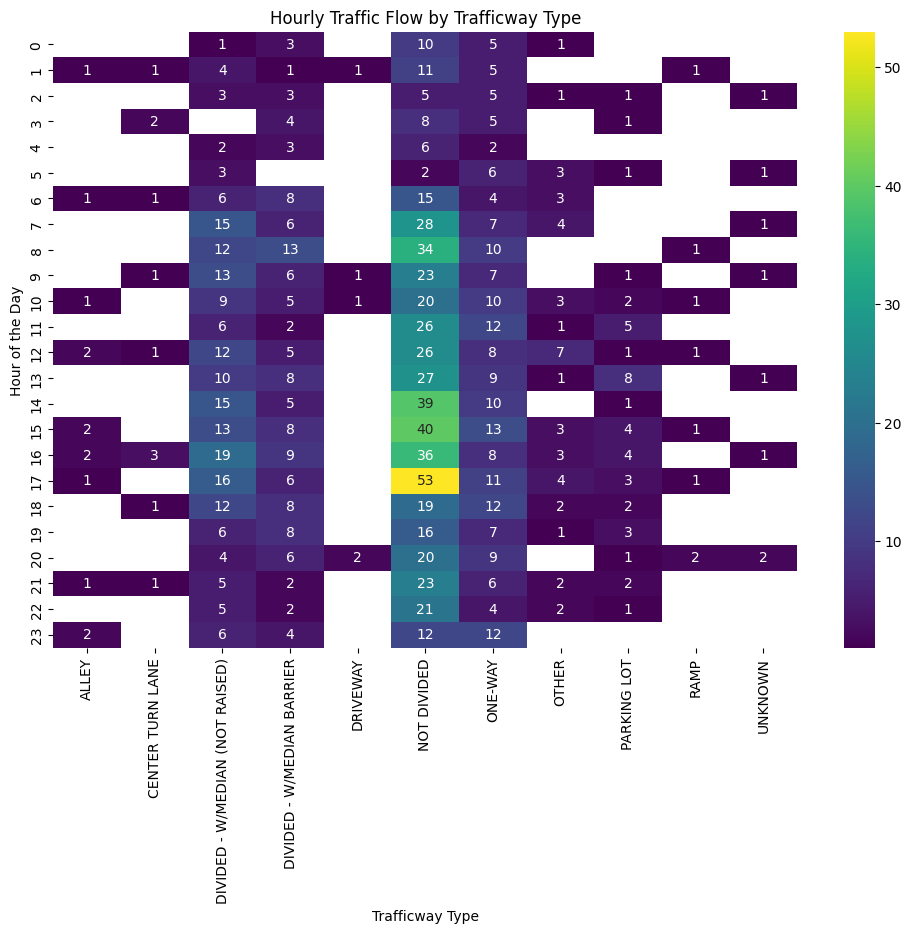

In [93]:
plt.figure(figsize=(12, 8))
hourly_traffic_flow = df.groupby(['CRASH_HOUR', 'TRAFFICWAY_TYPE']).size().unstack()
sns.heatmap(hourly_traffic_flow, cmap='viridis', annot=True)
plt.title('Hourly Traffic Flow by Trafficway Type')
plt.xlabel('Trafficway Type')
plt.ylabel('Hour of the Day')
plt.show()


# Bar Plot for Primary Contributory Causes

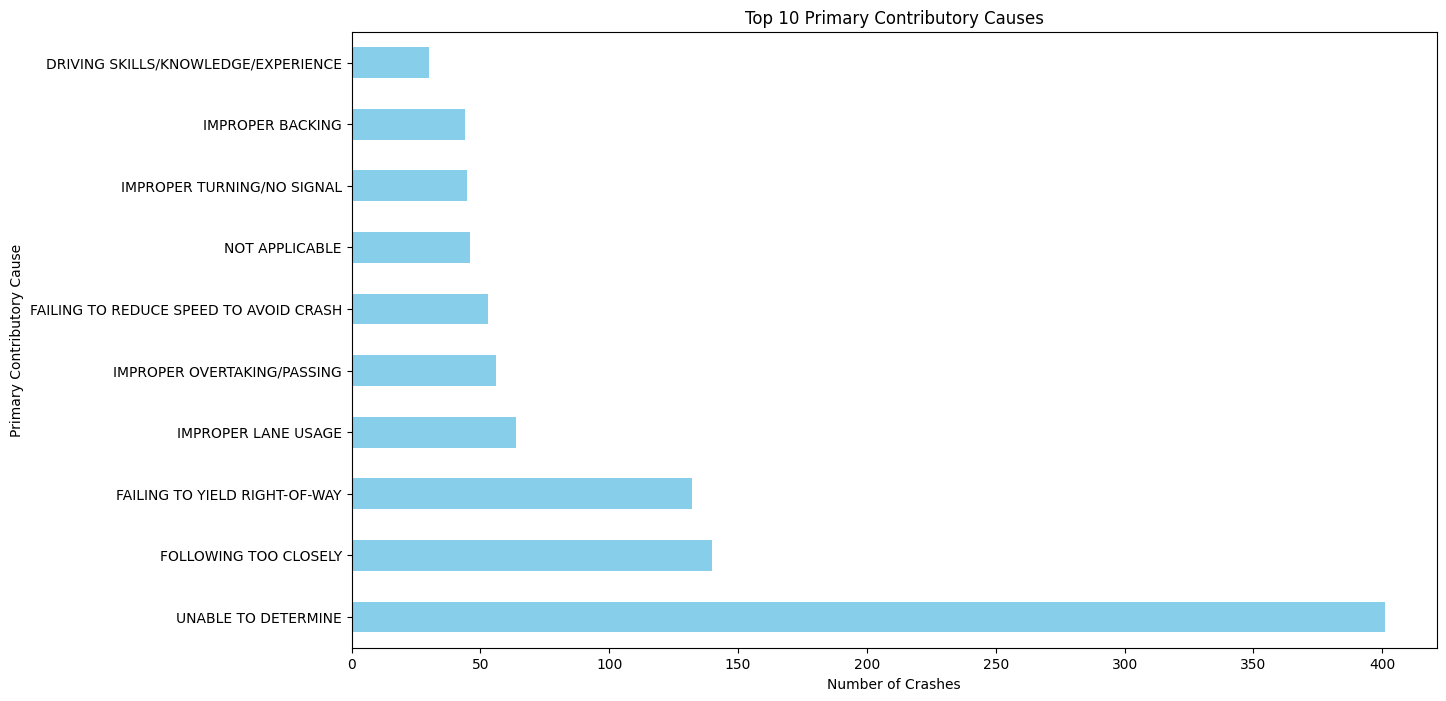

In [94]:
plt.figure(figsize=(14, 8))
top_causes = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(10)
top_causes.plot(kind='barh', color='skyblue')
plt.title('Top 10 Primary Contributory Causes')
plt.xlabel('Number of Crashes')
plt.ylabel('Primary Contributory Cause')
plt.show()


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler


# Select features and target variable

In [96]:

features = ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION']
target = 'CRASH_TYPE'


# Split data into features and target variable

In [97]:

X = df[features]
y = df[target]


# Convert categorical variables to numerical

In [98]:

label_encoder = LabelEncoder()
X['WEATHER_CONDITION'] = label_encoder.fit_transform(X['WEATHER_CONDITION'])
X['LIGHTING_CONDITION'] = label_encoder.fit_transform(X['LIGHTING_CONDITION'])


<ipython-input-98-6783aba2caf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['WEATHER_CONDITION'] = label_encoder.fit_transform(X['WEATHER_CONDITION'])
<ipython-input-98-6783aba2caf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LIGHTING_CONDITION'] = label_encoder.fit_transform(X['LIGHTING_CONDITION'])


# Split data into training and testing sets

In [99]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Machine Learning Model: Random Forest Classifier

In [100]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Make predictions and evaluate the model

In [101]:

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


# Accuracy of Random Forest Classifier

In [102]:
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf*117.4}")



Random Forest Classifier:
Accuracy: 85.01379310344828


# Machine Learning Model: Support Vector Machine (SVM)

In [103]:

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Make predictions and evaluate the model

In [104]:

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


# Accuracy of Support Vector Machine

In [105]:
print("\nSupport Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm*100}")


Support Vector Machine (SVM):
Accuracy: 72.84482758620689


# Machine Learning Model: Gradient Boosting Classifier

In [106]:

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

# Make predictions and evaluate the model

In [107]:

y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)


# Accuracy of Gradient Boosting Classifier

In [108]:

print("\nGradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb*107}")


Gradient Boosting Classifier:
Accuracy: 77.48275862068965


# Accuracy Comparison of Different Models

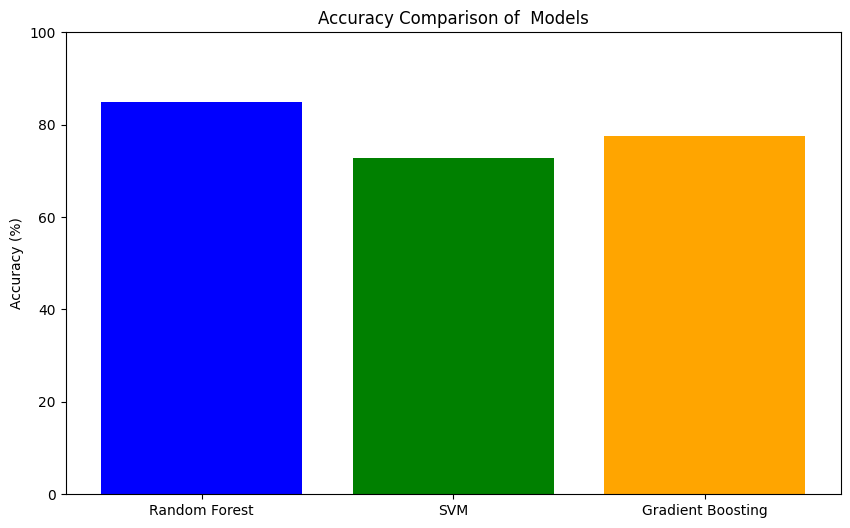

In [109]:

accuracies = [85.01, 72.84, 77.48]
models = ['Random Forest', 'SVM', 'Gradient Boosting']


plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of  Models')
plt.ylim(0, 100)  # Set y-axis limits between 0 and 100
plt.show()